**Olympic Summer & Winter Games, 1896-2022**

In [98]:
import pandas as pd
import numpy as np

In [99]:
#Librerías de Visualización
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


## Descripción de los dataset
**Athletic_csv**
- athlete_url
- athlete_full_name 
- games_participations
- first_game
- athlete_year_birth
- athlete_medals
- bio

In [100]:
athletic= pd.read_csv(r'C:\Users\maria\Documents\FormacionDataAnalytics\EDA_Olympic_games\olympic_athletes.csv')

In [101]:
athletic.head()

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
0,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,1,Beijing 2022,2000.0,NaN,NaN
1,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,2,PyeongChang 2018,1995.0,NaN,NaN
2,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,1,Beijing 2022,1993.0,NaN,NaN
3,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,1,Beijing 2022,1995.0,NaN,NaN
4,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,1,Beijing 2022,1989.0,NaN,NaN


In [102]:
athletic.columns

Index(['athlete_url', 'athlete_full_name', 'games_participations',
       'first_game', 'athlete_year_birth', 'athlete_medals', 'bio'],
      dtype='object')

In [103]:
athletic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75904 entries, 0 to 75903
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   athlete_url           75904 non-null  object 
 1   athlete_full_name     75904 non-null  object 
 2   games_participations  75904 non-null  int64  
 3   first_game            75882 non-null  object 
 4   athlete_year_birth    73448 non-null  float64
 5   athlete_medals        15352 non-null  object 
 6   bio                   22842 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.1+ MB


In [104]:
athletic.describe().T

,count,mean,std,min,25%,50%,75%,max
games_participations,75904.0,1.535874,0.854563,0.0,1.0,1.0,2.0,10.0
athlete_year_birth,73448.0,1961.619377,28.129576,1836.0,1946.0,1968.0,1983.0,2009.0


In [105]:
athletic.shape

(75904, 7)

## Gestión de duplicados

In [106]:
df_duplicados=athletic[athletic['athlete_full_name'].duplicated(keep=False)]
df_duplicados.shape

(800, 7)

In [107]:
duplicados_conteo = athletic['athlete_full_name'].value_counts()
duplicados_conteo = duplicados_conteo[duplicados_conteo > 1]
duplicados_conteo

athlete_full_name
Ivan IVANOV        4
Sandeep KUMAR      4
Luis MARTINEZ      4
Jose PEREZ         4
Singh SINGH        4
                  ..
Vladimir KOSLOV    2
John CAMPBELL      2
Boris PAVLOV       2
Hiroshi SUZUKI     2
Jose CARVALHO      2
Name: count, Length: 376, dtype: int64

In [108]:
df_Ivan= athletic.loc[athletic['athlete_full_name']== "Ivan IVANOV"]
df_Ivan

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
12242,https://olympics.com/en/athletes/ivan-ivanov-8,Ivan IVANOV,1,Rio 2016,1989.0,NaN,NaN
18714,https://olympics.com/en/athletes/ivan-ivanov,Ivan IVANOV,1,Beijing 2008,1986.0,NaN,NaN
29915,https://olympics.com/en/athletes/ivan-ivanov-6,Ivan IVANOV,1,Atlanta 1996,1968.0,NaN,NaN
30748,https://olympics.com/en/athletes/ivan-ivanov-1,Ivan IVANOV,1,Atlanta 1996,1974.0,NaN,NaN


In [109]:
df_sandeep= athletic.loc[athletic['athlete_full_name']== "Sandeep KUMAR"]
df_sandeep

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
6539,https://olympics.com/en/athletes/sandeep-kumar-2,Sandeep KUMAR,2,Rio 2016,1986.0,NaN,NaN
18603,https://olympics.com/en/athletes/sandeep-kumar-3,Sandeep KUMAR,1,Beijing 2008,1983.0,NaN,NaN
30971,https://olympics.com/en/athletes/sandeep-kumar,Sandeep KUMAR,1,Atlanta 1996,1975.0,NaN,NaN
70037,https://olympics.com/en/athletes/sandeep-kumar-1,Sandeep KUMAR,1,London 2012,1988.0,NaN,NaN


Ejercicio para comprobar la relación entre los duplicados, se descarta error en el set de datos. Son coincidencias de nombres no son duplicados de datos, ya que las fechas de nacimiento son diferentes. 

In [110]:
duplicados = athletic[athletic.duplicated(subset=['athlete_full_name', 'athlete_year_birth'], keep=False)]
duplicados.shape

(74, 7)

In [111]:
duplicados= duplicados.sort_values(by=['athlete_full_name'])
duplicados

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio
1706,https://olympics.com/en/athletes/angelina-goli...,Angelina GOLIKOVA,3,Sochi 2014,1991.0,\n\n\n1\n\nB\n\n,NaN
7225,https://olympics.com/en/athletes/angelina-goli...,Angelina GOLIKOVA,2,Sochi 2014,1991.0,NaN,NaN
1746,https://olympics.com/en/athletes/ayano-sato,Ayano SATO,2,PyeongChang 2018,1996.0,\n\n\n1\n\nG\n\n\n\n1\n\nS\n\n,NaN
3366,https://olympics.com/en/athletes/ayano-sato-x4383,Ayano SATO,1,Tokyo 2020,1996.0,NaN,NaN
1667,https://olympics.com/en/athletes/bart-swings,Bart SWINGS,3,Sochi 2014,1991.0,\n\n\n1\n\nG\n\n\n\n1\n\nS\n\n,NaN
...,...,...,...,...,...,...,...
7232,https://olympics.com/en/athletes/yekaterina-ay...,Yekaterina AYDOVA,3,Vancouver 2010,1991.0,NaN,NaN
1699,https://olympics.com/en/athletes/yu-ting-huang,Yu-Ting HUANG,2,Atlanta 1996,1988.0,NaN,NaN
7233,https://olympics.com/en/athletes/huang-yu-ting,Yu-Ting HUANG,1,PyeongChang 2018,1988.0,NaN,NaN
7612,https://olympics.com/en/athletes/jang,Yujin JANG,1,PyeongChang 2018,2001.0,NaN,NaN


Tras considerar la necesidad formativa de descubrir si eran reales o no duplicados se encuentra que 32 filas deberias de ser eliminadas para tener un set mas limpio y con menos distorción de datos. El porcetaje es bastante irrelevante sino fueran medallistas estos duplicados.

In [112]:
print(duplicados['athlete_medals'].unique())

['\n\n\n1\n\nB\n\n' nan '\n\n\n1\n\nG\n\n\n\n1\n\nS\n\n'
 '\n\n\n1\n\nS\n\n' '\n\n\n1\n\nG\n\n' '\n\n\n1\n\nG\n\n\n\n1\n\nB\n\n'
 '\n\n\n4\n\nG\n\n\n\n1\n\nS\n\n' '\n\n\n2\n\nG\n\n'
 '\n\n\n1\n\nG\n\n\n\n3\n\nB\n\n' '\n\n\n1\n\nG\n\n\n\n2\n\nS\n\n']


## Gestión de Nulos

In [113]:
athletic.isnull().sum()

athlete_url                 0
athlete_full_name           0
games_participations        0
first_game                 22
athlete_year_birth       2456
athlete_medals          60552
bio                     53062
dtype: int64

In [114]:
athletic['athlete_medals'].unique()

array([nan, '\n\n\n1\n\nS\n\n', '\n\n\n1\n\nB\n\n',
       '\n\n\n1\n\nG\n\n\n\n2\n\nS\n\n', '\n\n\n1\n\nG\n\n',
       '\n\n\n1\n\nG\n\n\n\n1\n\nB\n\n', '\n\n\n2\n\nG\n\n\n\n1\n\nS\n\n',
       '\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n', '\n\n\n2\n\nS\n\n\n\n1\n\nB\n\n',
       '\n\n\n2\n\nB\n\n', '\n\n\n1\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n',
       '\n\n\n1\n\nG\n\n\n\n1\n\nS\n\n', '\n\n\n1\n\nS\n\n\n\n3\n\nB\n\n',
       '\n\n\n2\n\nG\n\n\n\n4\n\nS\n\n\n\n5\n\nB\n\n',
       '\n\n\n3\n\nG\n\n\n\n2\n\nS\n\n', '\n\n\n2\n\nG\n\n\n\n2\n\nB\n\n',
       '\n\n\n2\n\nG\n\n\n\n2\n\nS\n\n\n\n1\n\nB\n\n',
       '\n\n\n4\n\nG\n\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n', '\n\n\n2\n\nG\n\n',
       '\n\n\n1\n\nS\n\n\n\n2\n\nB\n\n', '\n\n\n2\n\nG\n\n\n\n1\n\nB\n\n',
       '\n\n\n3\n\nB\n\n', '\n\n\n2\n\nS\n\n', '\n\n\n3\n\nG\n\n',
       '\n\n\n1\n\nG\n\n\n\n2\n\nS\n\n\n\n1\n\nB\n\n',
       '\n\n\n1\n\nG\n\n\n\n2\n\nB\n\n', '\n\n\n4\n\nG\n\n',
       '\n\n\n3\n\nG\n\n\n\n1\n\nB\n\n', '\n\n\n6\n\nG\n\n\n\n1\n\nB\

In [115]:
athletic['athlete_medals'].count()/len(athletic)*100

20.225548060708263

In [116]:

df_medals=pd.DataFrame(athletic['athlete_medals'].dropna())

In [117]:
df_medals

,athlete_medals
5,\n\n\n1\n\nS\n\n
6,\n\n\n1\n\nB\n\n
7,\n\n\n1\n\nB\n\n
16,\n\n\n1\n\nG\n\n\n\n2\n\nS\n\n
18,\n\n\n1\n\nG\n\n
...,...
75858,\n\n\n1\n\nS\n\n\n\n1\n\nB\n\n
75861,\n\n\n1\n\nG\n\n
75868,\n\n\n1\n\nB\n\n
75878,\n\n\n1\n\nG\n\n


Tras dar varias vueltas a la gestion de nulos del campo Medallas, deja claro que una columna sin datos para trabajar. Sin duda se puede eliminar. El 20% de datos que exisite es nulo también.

In [118]:
athletic['first_game'].unique()

array(['Beijing 2022', 'PyeongChang 2018', 'Sochi 2014', 'Vancouver 2010',
       'Atlanta 1996', 'Turin 2006', 'Salt Lake City 2002', 'Nagano 1998',
       nan, 'Rio 2016', 'Grenoble 1968', 'Berlin 1936', 'Tokyo 2020',
       'Athens 2004', 'Montreal 1976', 'Los Angeles 1984',
       'Albertville 1992', 'Beijing 2008', 'Sarajevo 1984', 'London 2012',
       'Sydney 2000', 'Seoul 1988', 'Mexico City 1968', 'Barcelona 1992',
       'Helsinki 1952', 'Rome 1960', 'Lillehammer 1994', 'Moscow 1980',
       'Munich 1972', 'Tokyo 1964', 'Calgary 1988', 'Lake Placid 1980',
       "Cortina d'Ampezzo 1956", 'Innsbruck 1976', 'Sapporo 1972',
       'Melbourne 1956', 'Innsbruck 1964', 'London 1948',
       'Squaw Valley 1960', 'St. Moritz 1948', 'Oslo 1952', 'Paris 1924',
       'Los Angeles 1932', 'Garmisch-Partenkirchen 1936',
       'Amsterdam 1928', 'Antwerp 1920', 'Lake Placid 1932',
       'St. Moritz 1928', 'Paris 1900', 'Chamonix 1924', 'London 1908',
       'Stockholm 1912', 'Athens 1896'

In [119]:
athletic['year_games']=athletic['first_game'].str.split(" ").str[-1]
athletic['year_games']=athletic['year_games'].dropna().astype(int)

## Número de juegos olympicos y nombres

In [120]:
df_games = athletic[['first_game', 'year_games']]
df_games=df_games.sort_values(by='year_games')
df_games=df_games['first_game'].unique()
df_games=pd.DataFrame(df_games, columns=['first_game']).reset_index(drop=True)
df_games

,first_game
0,Athens 1896
1,Paris 1900
2,St. Louis 1904
3,London 1908
4,Stockholm 1912
5,Antwerp 1920
6,Chamonix 1924
7,Paris 1924
8,Amsterdam 1928
9,St. Moritz 1928


La evolución del movimiento olímpico durante los siglos XX y XXI ha dado lugar a varias modificaciones en los justa deportiva. El primero de estos ajustes fue la creación de los Juegos Olímpicos de invierno para deportes propios de esa estación, y que se realizaron por primera vez en Chamonix 1924. Se llevaron a cabo como parte del evento de verano, el COI los consideró como un evento separado retroactivo, y desde esa fecha comenzaron a efectuarse en el mismo año que los originales. Luego, con el fin de potenciar el desarrollo de los invernales, el organismo rector del olimpismo decidió desfasar la realización de los Juegos invernales a partir de Lillehammer 1994. Desde esa fecha, los Juegos Olímpicos de Invierno se realizan en los años pares entre dos Juegos de Verano.

In [121]:
athletic.columns

Index(['athlete_url', 'athlete_full_name', 'games_participations',
       'first_game', 'athlete_year_birth', 'athlete_medals', 'bio',
       'year_games'],
      dtype='object')

In [122]:
athletic['age_athletic_games']=athletic['year_games']-athletic['athlete_year_birth']
athletic['age_athletic_games'].unique()

array([ 22.,  23.,  29.,  27.,  33.,  20.,  21.,  26.,  18.,  28.,  30.,
        19.,  24.,  17.,  25.,  16.,  32.,  31.,   4.,  35.,  12.,  34.,
         7.,  14.,  nan,  39.,  37., -24., -61.,  44., 122., -11., -12.,
         8.,  -9.,  38.,  40.,  36.,  43.,  41.,  57.,  42.,  45.,  54.,
        48.,  15.,  52.,  13.,  11.,  -8.,  46., -43.,  49.,  51., -31.,
        -7., -14.,   3., -41.,  -1.,  47.,  56.,  50.,  62.,  60.,  55.,
       106.,  64.,  53.,  10., 121.,  70.,  97.,  61.,  67.,  58.,   1.,
         6.,  -5.,  -2.,   2., -10.,  93.,  -4.,   9.,  96.,   5., -13.,
        63.,  -3., -15.,  -6.,  89.,  73., -17., -16.,  66., -21., -20.,
       -22.,  59., -18.,  68., -25., -30., -28., -34., -33., -23.,  65.,
       -37., -35., -32., -39., -42., -51., -56., -57., -52., -47., -19.,
       -71., -40., -53., -82., -80., -92., -89., -97., -59., -85.,   0.])

In [123]:
age_wrong=(athletic['age_athletic_games']>0).sum()
age_wrong

73303

Vamos a elimniar todos los datos que distorcionan las estadísticas, teneindo en cuenta que tenemos un alto núemro de datos para tener una representacion de la smedias de edad. Y los datos a elimnar son claramente erroneos.

- El atleta más anciano en competir en unos Juegos Olímpicos es Óscar Swahn, un tirador sueco que compitió por primera vez en Londres 1908 con 60 años en la disciplina de ciervo móvil.
- El atleta más joven en competir en unos Juegos Olímpicos es el griego Dimitiros Loundras. Un gimnasta que arrancó su aventura olímpica con tan sólo 10 años. Un record tan díficil de batir que es uno de los más longevos, ya que se batió en la primera edición en Atenas 1896.


In [124]:
athletic= athletic[(athletic['age_athletic_games']>9)&(athletic['age_athletic_games']<61)]

In [125]:
athletic['age_athletic_games'].unique()

array([22., 23., 29., 27., 33., 20., 21., 26., 18., 28., 30., 19., 24.,
       17., 25., 16., 32., 31., 35., 12., 34., 14., 39., 37., 44., 38.,
       40., 36., 43., 41., 57., 42., 45., 54., 48., 15., 52., 13., 11.,
       46., 49., 51., 47., 56., 50., 60., 55., 53., 10., 58., 59.])

In [126]:
athletic['age_athletic_games'].shape

(73217,)

 ## Evolucion de la edad media de los atletas a lo largo de los juegos

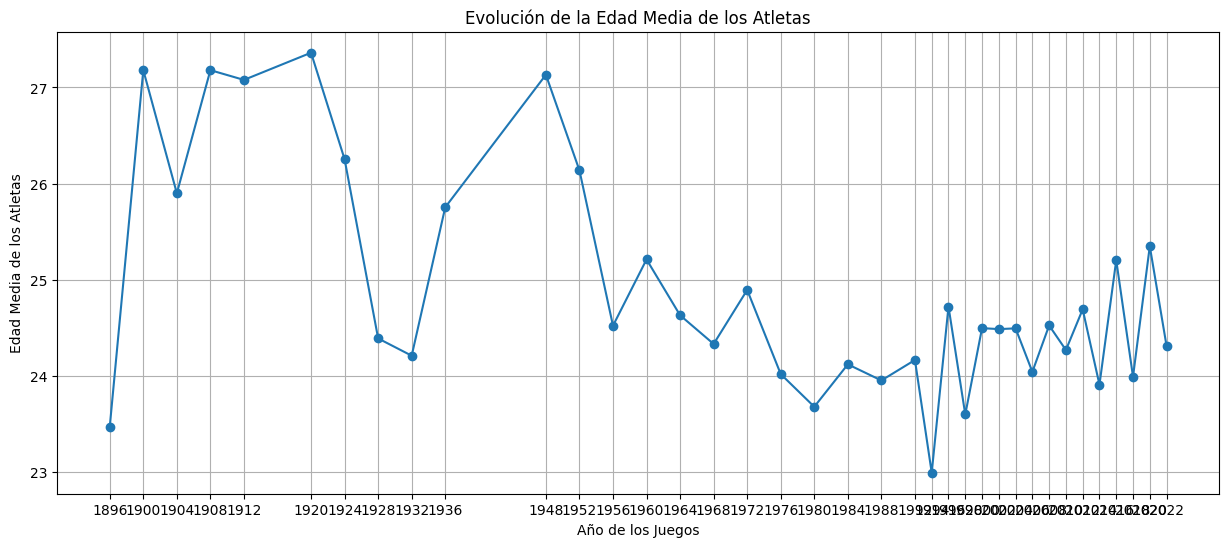

In [127]:
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame con la edad media por año
# Ejemplo de datos: df_mean_age con columnas 'year' y 'mean_age'
df_mean_age = athletic.groupby('year_games')['age_athletic_games'].mean().reset_index()

plt.figure(figsize=(15,6))
plt.plot(df_mean_age['year_games'], df_mean_age['age_athletic_games'], marker='o')
plt.title('Evolución de la Edad Media de los Atletas')
plt.xlabel('Año de los Juegos')
plt.ylabel('Edad Media de los Atletas')
plt.grid()
plt.xticks(df_mean_age['year_games'])  # Asegúrate de mostrar todos los años
plt.show()


Número de atletas que han juego en cada Juego

In [128]:
df_athletic_games=athletic.groupby('first_game')['athlete_full_name'].count().reset_index()
df_athletic_games=df_athletic_games.sort_values(by='athlete_full_name', ascending=False)

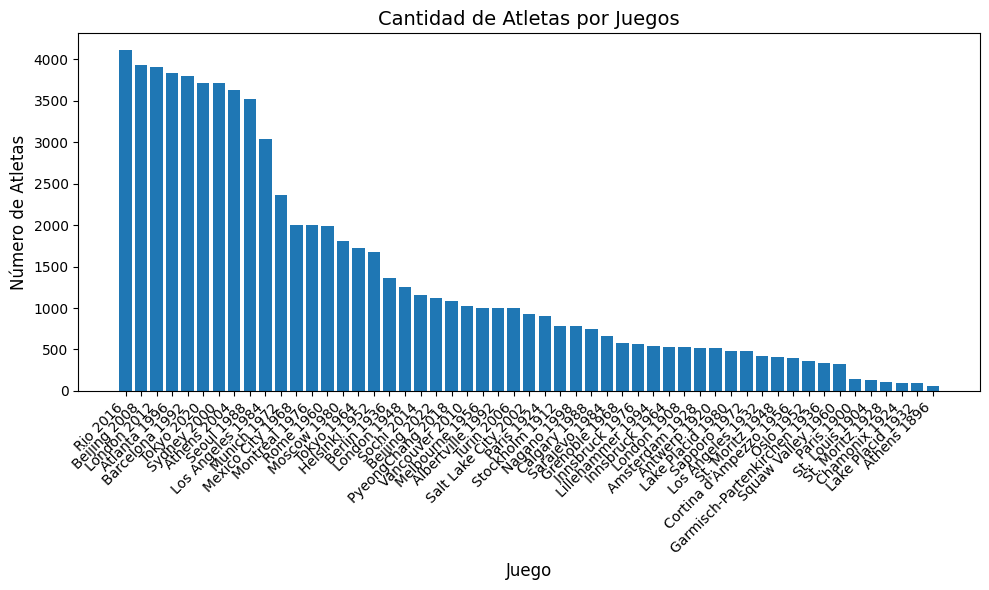

In [129]:
plt.figure(figsize=(10,6))
plt.bar(df_athletic_games['first_game'], df_athletic_games['athlete_full_name'])

plt.title('Cantidad de Atletas por Juegos', fontsize= 14)
plt.xlabel('Juego', fontsize=12)
plt.ylabel('Número de Atletas', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()


In [130]:
athletic.columns

Index(['athlete_url', 'athlete_full_name', 'games_participations',
       'first_game', 'athlete_year_birth', 'athlete_medals', 'bio',
       'year_games', 'age_athletic_games'],
      dtype='object')

## Evolucion de participante en los Juegos

In [131]:
df_athletic_games['year']=df_athletic_games['first_game'].str.split(' ').str[-1]
df_athletic_games=df_athletic_games.sort_values(by='year')

In [132]:
df_athletic_games

,first_game,athlete_full_name,year
3,Athens 1896,64,1896
33,Paris 1900,144,1900
44,St. Louis 1904,129,1904
21,London 1908,528,1908
47,Stockholm 1912,789,1912
2,Antwerp 1920,512,1920
11,Chamonix 1924,92,1924
34,Paris 1924,902,1924
45,St. Moritz 1928,106,1928
1,Amsterdam 1928,513,1928


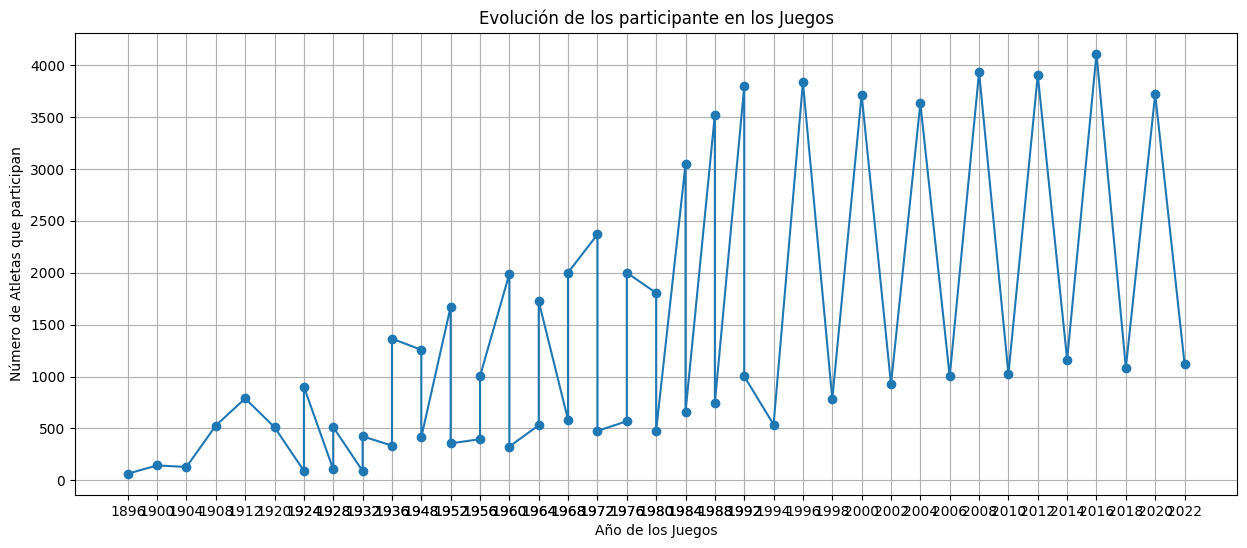

In [133]:
plt.figure(figsize=(15,6))
plt.plot(df_athletic_games['year'], df_athletic_games['athlete_full_name'], marker='o')
plt.title('Evolución de los participante en los Juegos')
plt.xlabel('Año de los Juegos')
plt.ylabel('Número de Atletas que participan')
plt.grid()
plt.xticks(df_athletic_games['year'])  # Asegúrate de mostrar todos los años
plt.show()

- Así pues, no fue hasta Atenas 1896 cuando se celebró la primera edición de los Juegos Olímpicos modernos. Desde entonces se han celebrado 29 ediciones, pues aunque haya habido 32 ciclos de cuatro años, hay tres casos (1916, 1940, 1944) en los que no se han celebrado por las guerras mundiales
- La evolución del movimiento olímpico durante los siglos XX y XXI ha dado lugar a varias modificaciones en los justa deportiva. El primero de estos ajustes fue la creación de los Juegos Olímpicos de invierno para deportes propios de esa estación, y que se realizaron por primera vez en Chamonix 1924. Se llevaron a cabo como parte del evento de verano, el COI los consideró como un evento separado retroactivo, y desde esa fecha comenzaron a efectuarse en el mismo año que los originales. Luego, con el fin de potenciar el desarrollo de los invernales, el organismo rector del olimpismo decidió desfasar la realización de los Juegos invernales a partir de Lillehammer 1994. Desde esa fecha, los Juegos Olímpicos de Invierno se realizan en los años pares entre dos Juegos de Verano.

- Además nos hace entender mejor este gráfico con dos clara líneas de tendencia por la separacion de los Juegos de Invierno. Que será la linea inferior que no muerta una alza de participante al igual que los Juegos de Verano, con una mayor participación pero misma tendencia al alza según evolucionan en la historia. 
- De esta conclusion sale el siguiente ejercicio.  ¿Podré predecir el número de participantes en la siguiente edición?